Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.5s finished


0.897


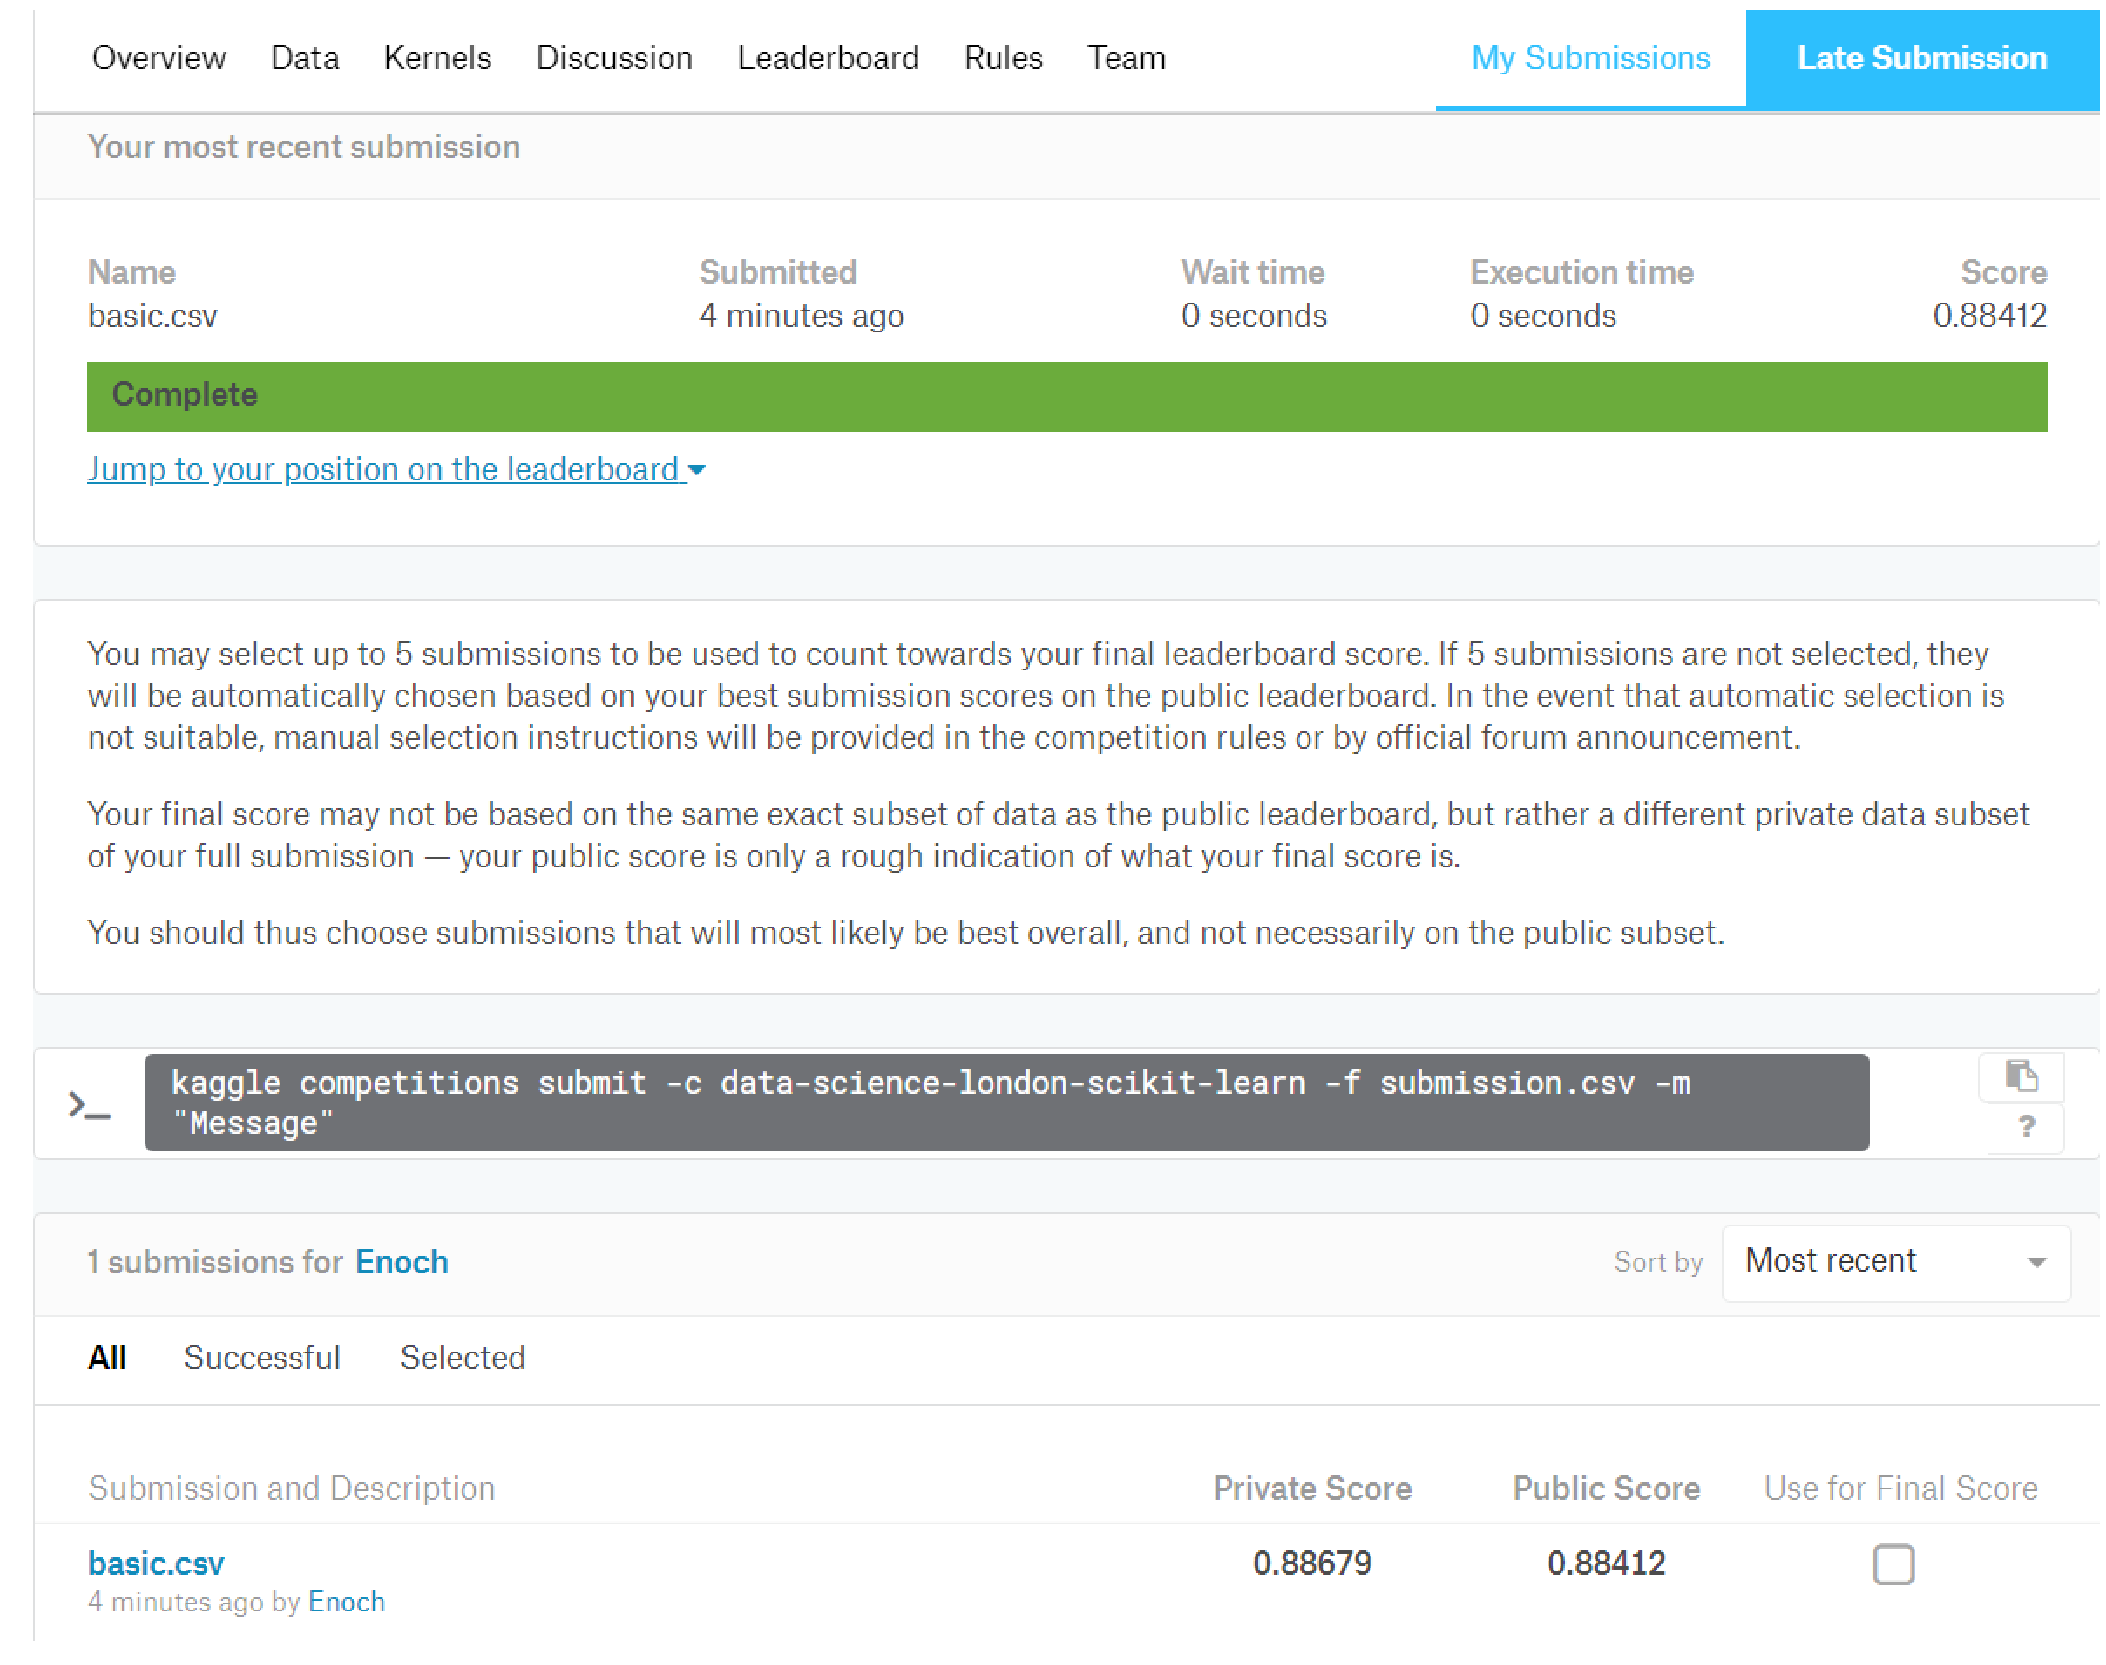

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

DATA_PATH = "./data/data-science-london-scikit-learn/"

data_train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), header=None)
data_train_labels = pd.read_csv(os.path.join(DATA_PATH, "trainLabels.csv"), header=None)
data_test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), header=None)

# train = data_train.copy()
# train_labels = data_train_labels.copy().values.flatten()
# test = data_test.copy()
# imputer = SimpleImputer(strategy="median")
# scaler = MinMaxScaler(feature_range=(0, 1))
#
# imputer.fit(train)
# train = imputer.transform(train)
# test = imputer.transform(test)
#
# scaler.fit(train)
# train = scaler.transform(train)
# test = scaler.transform(test)
#
# logistic_reg = LogisticRegression(solver="lbfgs")
# logistic_reg.fit(train, train_labels)
# print(cross_val_score(logistic_reg, train, train_labels, cv=10).mean())

train_x = data_train.copy()
train_y = data_train_labels.copy().values.flatten()
test = data_test.copy()

n_estimators = [500]
max_depth = [5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=7), param_grid, scoring="neg_mean_squared_error", n_jobs=-1, iid=False, cv=10, verbose=1)
grid_result = grid_search.fit(train_x, train_y)

gb_clf = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'], n_estimators=grid_result.best_params_['n_estimators'])
gb_clf.fit(train_x, train_y)
print(cross_val_score(gb_clf, train_x, train_y, cv=10).mean())

# pred = pd.DataFrame(data={"Id": list(range(1, test.shape[0] + 1)), "Solution": gb_clf.predict(test)})
# pred.to_csv(os.path.abspath("./result/basic.csv"), index=0)

img = plt.imread(os.path.abspath("./result/basic_snapshot.png"))
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.axis("off")
plt.show()